### Big Data Analysis and Project - 2

#### Project - Toxic Comment  Classification

##### Varun Panchal
##### Student Id : a1786394
##### Semester 2,2020

#### 1) Importing libraries and loading dataset

In [1]:
#importing python libraries

%matplotlib inline

#libraries for EDA and data preprocessing steps

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import nltk
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#libraries for evaluating classified output

from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#loading train and test data 
#loading sample file for creating final submission .csv file 

txcmnt_clf_train = pd.read_csv('train.csv')
txcmnt_clf_test = pd.read_csv('test.csv')
classified_comments = pd.read_csv('sample_submission.csv')

In [3]:
#checking the loaded data

print(txcmnt_clf_train.head()) #train

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(txcmnt_clf_test.head()) #test set

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


#### 2) EDA (Exploratory Data Analysis)

In [5]:
#checking train dataset rows and columns 

print(txcmnt_clf_train.shape)

(159571, 8)


In [6]:
#checking test dataset rows

print(txcmnt_clf_test.shape)

(153164, 2)


In [7]:
#checking null values in train data set

print(txcmnt_clf_train.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [8]:
print(txcmnt_clf_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


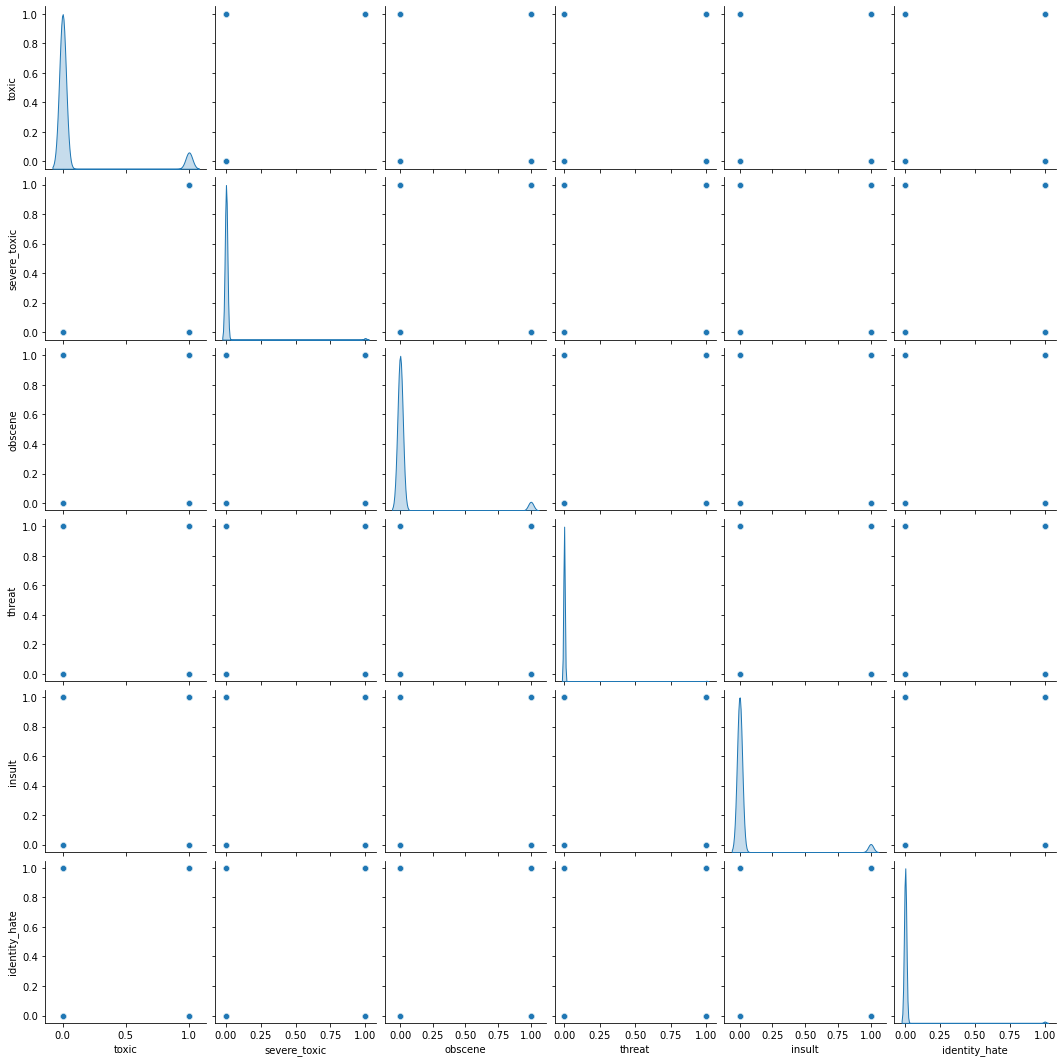

In [9]:
#checking pairplots

sns.pairplot(txcmnt_clf_train,diag_kind='kde')

In [10]:
#checking count of each category - i.e. toxic/severe_toxic/obscene/threat/insult/identity_hate

cmnt_category = txcmnt_clf_train.columns[2:]
print(cmnt_category)

category_count = txcmnt_clf_train.iloc[:,2:].sum().values
print(category_count)

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')
[15294  1595  8449   478  7877  1405]


In [11]:
#checking profile report of train dataset - using pandas profiling - for further analysis

txcmnt_clf_train.profile_report()

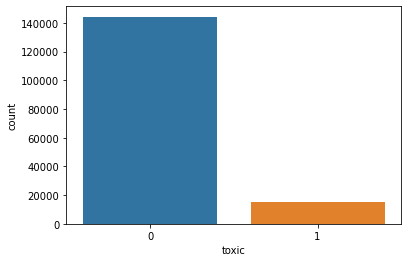

In [12]:
#plotting countplot for toxic comments of train data to verify statistics with profile report

sns.countplot(x=txcmnt_clf_train['toxic'],data=txcmnt_clf_train)

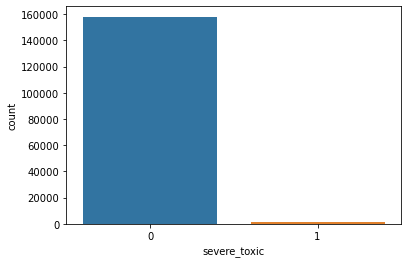

In [13]:
#plotting countplot for severe_toxic comments of train data to verify statistics with profile report

#the count are found to be identical

sns.countplot(x=txcmnt_clf_train['severe_toxic'],data=txcmnt_clf_train)

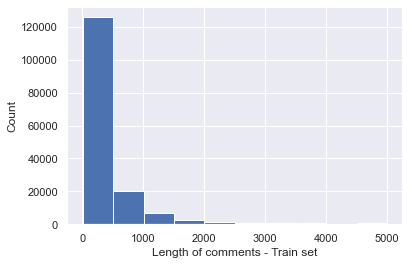

In [14]:
#plotting histogram to check train dataset comments length

train_cmnt_len = txcmnt_clf_train['comment_text'].apply(lambda x : len(str(x)))
sns.set()
train_cmnt_len.hist()
plt.xlabel('Length of comments - Train set')
plt.ylabel('Count')
plt.show()

In [15]:
#getting numeric representation and stats seems to align with profile report generated above

print(train_cmnt_len.describe().transpose())

count    159571.000000
mean        394.138847
std         590.725381
min           5.000000
25%          96.000000
50%         205.000000
75%         436.000000
max        5000.000000
Name: comment_text, dtype: float64


In [16]:
#checking memory usage 

print(txcmnt_clf_train.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 109.6 MB
None


In [17]:
#chceking for null values in test set - EDA for test set

print(txcmnt_clf_test.isnull().sum())

id              0
comment_text    0
dtype: int64


In [18]:
#checking profile report of test set so as to compare the legnth of comments and analyse

txcmnt_clf_test.profile_report()

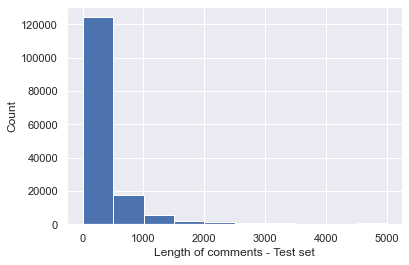

In [19]:
#plotting histogram to check test dataset comments length

test_cmnt_len = txcmnt_clf_test['comment_text'].apply(lambda x : len(str(x)))
sns.set()
test_cmnt_len.hist()
plt.xlabel('Length of comments - Test set')
plt.ylabel('Count')
plt.show()

In [20]:
#getting numeric representation and stats - seems to align with profile report generated above

print(test_cmnt_len.describe().transpose())

count    153164.000000
mean        364.875121
std         592.492099
min           1.000000
25%          79.000000
50%         180.000000
75%         392.000000
max        5000.000000
Name: comment_text, dtype: float64


In [21]:
#code cell commented - following code was used while working on Jupyter notebook, so as to download the profile report in html form and attach in submission folder for reference

#generating and downloading profile report in html form, the downloaded report is attached in submission folder as well
#train_profile_report = txcmnt_clf_train.profile_report(title='Train dataset Pandas Profiling report')
#train_profile_report.to_file('trainset_profile_report.html')

#### 3) Data Preprocessing - Cleaning data/Noise removal, Feature Extraction etc.

In [22]:
#function to remove punctuations

def del_punctuation(cmnts):
    return cmnts.translate(str.maketrans('', '', string.punctuation))

In [23]:
#functions to remove url and html tags

def del_url(cmnts):
    return re.sub(r"https?://\S+|www\.\S+", "", cmnts)

def del_html_ip(cmnts):
    txt = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(txt," ",str(cmnts) )

In [24]:
#function to remove numbers

def del_digits(cmnts):
    return cmnts.translate(str.maketrans('', '', string.digits))

In [25]:
#function to output cleaned comments in dataset

def cleaned_data(cmnts):
    cmnts = cmnts.replace("i'm",'i am')
    cmnts = cmnts.replace("what's", "what is")
    cmnts = cmnts.replace("i'll", "i will")
    cmnts = cmnts.replace("i'd", "i had")
    cmnts = cmnts.replace("i've", "i have")
    cmnts = del_punctuation(cmnts)
    cmnts = del_url(cmnts)
    cmnts = del_html_ip(cmnts)
    cmnts = del_digits(cmnts)
    return cmnts

In [26]:
#converting train set to lower case - prior to appyling cleaned_data function

txcmnt_clf_train['comment_text'] = txcmnt_clf_train['comment_text'].apply(lambda x : x.lower())

In [27]:
#converting test set to lower case - prior to appyling cleaned_data function

txcmnt_clf_test['comment_text'] = txcmnt_clf_test['comment_text'].apply(lambda x : x.lower())

In [28]:
#applying cleaned_data function on comments of train dataset

txcmnt_clf_train['comment_text'] = txcmnt_clf_train['comment_text'].apply(cleaned_data)

In [29]:
#applying cleaned_data function on comments of test dataset

txcmnt_clf_test['comment_text'] = txcmnt_clf_test['comment_text'].apply(cleaned_data)

In [30]:
#verifying output after cleaning the data - punctuation(?) removed and comment converted to lower case in train set

print(txcmnt_clf_train['comment_text'][4])

you sir are my hero any chance you remember what page thats on


In [31]:
#the particular comment consisted of ip (76.122.79.82) - digits removed in train set

print(txcmnt_clf_train['comment_text'][44])

i am sorry 

i am sorry i screwed around with someones talk page  it was very bad to do  i know how having the templates on their talk page helps you assert your dominance over them  i know i should bow down to the almighty administrators  but then again i am going to go play outsidewith your mom   


In [32]:
#checking test data set comment

print(txcmnt_clf_test['comment_text'][41])

 
 i am not convinced that he was blind where is this documented its possible that he was just what wed call legally blind ie didnt have great vision and that the name blind blake is an exaggerated moniker although i have no proof i have got a feeling that him being legally blind is more likely than totally blind of course i have got no evidence to back that thing up


In [33]:
#function to remove stopwords

from nltk.corpus import stopwords #importing from nltk (Natural language toolkit)

stop_words_list = set(stopwords.words('english'))
concatenate_stop_words = re.compile(r"\b(" + "|".join(stop_words_list) + ")\\W", re.I)

def del_stopwords(cmnts):
    global concatenate_stop_words
    return concatenate_stop_words.sub(" ", cmnts)

In [34]:
#applying function on train dataset

txcmnt_clf_train['comment_text'] = txcmnt_clf_train['comment_text'].apply(del_stopwords)

In [35]:
#applying function on test dataset

txcmnt_clf_test['comment_text'] = txcmnt_clf_test['comment_text'].apply(del_stopwords)

In [36]:
#checking comments of train set after removing stopwords

print(txcmnt_clf_train['comment_text'][4])

 sir   hero  chance  remember  page thats on


In [37]:
#checking comments of test set after removing stopwords

print(txcmnt_clf_test['comment_text'][41])

 
    convinced    blind    documented  possible      wed call legally blind ie didnt  great vision    name blind blake   exaggerated moniker although    proof   got  feeling    legally blind   likely  totally blind  course   got  evidence  back  thing up


In [38]:
#function for performing lemmatization

from nltk.stem import WordNetLemmatizer

def lemmatize_word(cmnts):
    lemmatizer = WordNetLemmatizer()
    lemma_list = nltk.word_tokenize(cmnts)
    lemmatize_cmnts = ' '.join([lemmatizer.lemmatize(words) for words in lemma_list])
    return lemmatize_cmnts

In [39]:
#applying lemmatization on train dataset

txcmnt_clf_train['comment_text'] = txcmnt_clf_train['comment_text'].apply(lambda x : lemmatize_word(x))

In [40]:
#applying lemmatization on test dataset

txcmnt_clf_test['comment_text'] = txcmnt_clf_test['comment_text'].apply(lambda x : lemmatize_word(x))

In [41]:
#checking comments after lemmatiztion - for train set

print(txcmnt_clf_train['comment_text'][4])

sir hero chance remember page thats on


In [42]:
#checking comments after lemmatiztion - for test set

print(txcmnt_clf_test['comment_text'][41])

convinced blind documented possible wed call legally blind ie didnt great vision name blind blake exaggerated moniker although proof got feeling legally blind likely totally blind course got evidence back thing up


In [43]:
#using tfidf vectorizer to convert text into vectors

tfidf_vect = TfidfVectorizer(max_features=10000,strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

In [44]:
#splitting train and validation set

train,validation = train_test_split(txcmnt_clf_train,test_size=0.30,shuffle=False)

In [45]:
trainset_cmnts = train['comment_text']
validationset_cmnts = validation['comment_text']

In [46]:
#using fit method of tfidf vectorizer to fit on train and validation set comments

print(tfidf_vect.fit(trainset_cmnts))
print(tfidf_vect.fit(validationset_cmnts))

TfidfVectorizer(max_features=10000, ngram_range=(1, 3), strip_accents='unicode')
TfidfVectorizer(max_features=10000, ngram_range=(1, 3), strip_accents='unicode')


In [47]:
#creating X_train and X_val variables having transformed data

X_train = tfidf_vect.transform(trainset_cmnts)

X_val = tfidf_vect.transform(validationset_cmnts)

In [48]:
print(X_train.shape)

(111699, 10000)


In [49]:
print(X_val.shape)

(47872, 10000)


In [50]:
#creating X_test using test dataset

testset_cmnts = txcmnt_clf_test['comment_text']
X_test = tfidf_vect.transform(testset_cmnts)

In [51]:
print(X_test.shape)

(153164, 10000)


#### 4) Applying DecisionTree Classifier Model

In [52]:
#importing from sklearn model and instantiating the class

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')

In [53]:
#fitting on each category, checking model accuracy and validation set accuracy

cv = StratifiedKFold(n_splits=3,shuffle=True)

for i in cmnt_category:
    
    y_train = train[i]
    y_val = validation[i]
    
    print('For {} comments,'.format(i))
    
    dt_model.fit(X_train,y_train)
    
    y_pred = dt_model.predict(X_val)
    
    scores = cross_val_score(dt_model,X_val,y_val,cv=cv)
    
    print('Accuracy : ' , accuracy_score(y_val, y_pred))
    print('Model score : ', dt_model.score(X_val,y_val))
    print('Cross validation scores : ', scores)
    print('Hamming loss : ', hamming_loss(y_val,y_pred))
    print("\n")
    
    
#predicting probabilities for test set    
    pred_prob = dt_model.predict_proba(X_test)[:,1:]
    classified_comments[i] = pred_prob

For toxic comments,
Accuracy :  0.9390040106951871
Model score :  0.9390040106951871
Cross validation scores :  [0.93564356 0.9358902  0.93488751]
Hamming loss :  0.060995989304812835


For severe_toxic comments,
Accuracy :  0.9866727941176471
Model score :  0.9866727941176471
Cross validation scores :  [0.98759243 0.98803033 0.98777966]
Hamming loss :  0.01332720588235294


For obscene comments,
Accuracy :  0.9733664772727273
Model score :  0.9733664772727273
Cross validation scores :  [0.97374358 0.97073385 0.9726139 ]
Hamming loss :  0.026633522727272728


For threat comments,
Accuracy :  0.9964070855614974
Model score :  0.9964070855614974
Cross validation scores :  [0.99617747 0.99661591 0.99667857]
Hamming loss :  0.003592914438502674


For insult comments,
Accuracy :  0.9618566176470589
Model score :  0.9618566176470589
Cross validation scores :  [0.96083469 0.9571348  0.96058156]
Hamming loss :  0.03814338235294118


For identity_hate comments,
Accuracy :  0.9893048128342246
Mo

In [54]:
classified_comments.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1.0,0.0,1.0,0.0,1.0,0.0
1,0000247867823ef7,0.0,0.0,0.0,0.0,0.0,0.0
2,00013b17ad220c46,0.0,0.0,0.0,0.0,0.0,0.0
3,00017563c3f7919a,0.0,0.0,0.0,0.0,0.0,0.0
4,00017695ad8997eb,0.0,0.0,0.0,0.0,0.0,0.0
5,0001ea8717f6de06,0.0,0.0,0.0,0.0,0.0,0.0
6,00024115d4cbde0f,0.0,0.0,0.0,0.0,0.0,0.0
7,000247e83dcc1211,0.0,0.0,0.0,0.0,0.0,0.0
8,00025358d4737918,1.0,0.0,0.0,0.0,0.0,0.0
9,00026d1092fe71cc,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#generating csv file

classified_comments.to_csv('classified_comments.csv',index=False)